In [14]:
import pandas as pd
hn = pd.read_csv('hacker_news.csv')

In [15]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


In [16]:
hn.shape

(20099, 7)

In [17]:
#regex
import re

In [18]:
#search for 'and' in 'hand', returns a match object if matched
matchObj = re.search("and", "hand")
print(matchObj)

<re.Match object; span=(1, 4), match='and'>


In [19]:
titles = hn["title"].tolist()
python_mentions = 0
pattern = '[Pp]ython'

for title in titles:
    if re.search(pattern, title):
        python_mentions += 1
        
print(python_mentions)

160


In [20]:
#use a vectorized method with series
titles = hn["title"]
pattern_bool = titles.str.contains(pattern)
print(pattern_bool.sum())

160


In [21]:
ruby_pattern = '[Rr]uby'
ruby_bool = titles.str.contains(ruby_pattern)
ruby_titles = titles[ruby_bool]

the {} values are called quantifiers
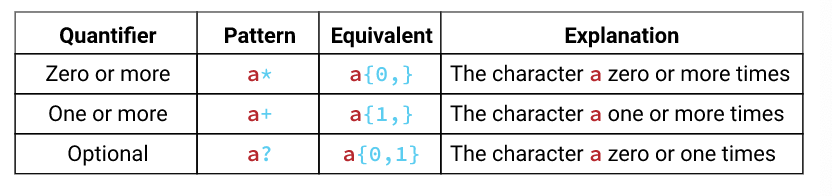

In [22]:
email_pattern = 'e-?mail'
email_bool = titles.str.contains(email_pattern)
email_count = email_bool.sum()
email_titles = titles[email_bool]

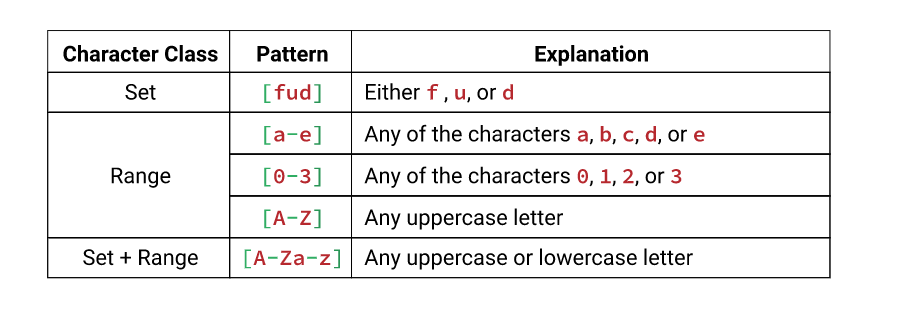

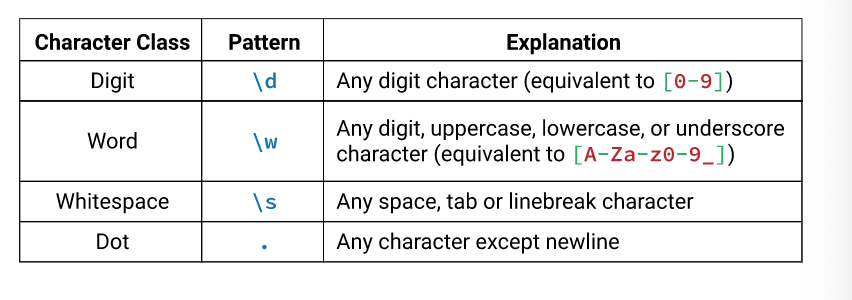

In [23]:
#find number of titles with a tag, eg [video]
pattern = '\[\w+\]'
tag_bool = titles.str.contains(pattern)
tag_count = tag_bool.sum()
tag_count

444

# raw string, eg print(r'hello\b world') prints hello\b world

In [24]:
#use a capture group to get counts of the different tags. indicated by () 
pattern = r"\[(\w+)\]"
tag_bool = titles.str.contains(pattern)
tag_titles = titles[tag_bool]
#get series with just matches of the pattern
matches = tag_titles.str.extract(pattern)
matches
tag_freq = matches[0].value_counts()
tag_freq

/Users/marcuschoi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


pdf            276
video          111
audio            3
2015             3
slides           2
beta             2
2014             2
React            1
Challenge        1
Australian       1
SPA              1
NSFW             1
updated          1
transcript       1
png              1
5                1
song             1
ANNOUNCE         1
survey           1
videos           1
SpaceX           1
Excerpt          1
crash            1
Skinnywhale      1
Petition         1
Map              1
Python           1
2008             1
GOST             1
1996             1
JavaScript       1
Beta             1
comic            1
viz              1
CSS              1
Live             1
map              1
Ubuntu           1
detainee         1
coffee           1
repost           1
blank            1
gif              1
satire           1
ask              1
USA              1
Videos           1
German           1
Benchmark        1
much             1
Infograph        1
HBR              1
Name: 0, dty

# negative character classes
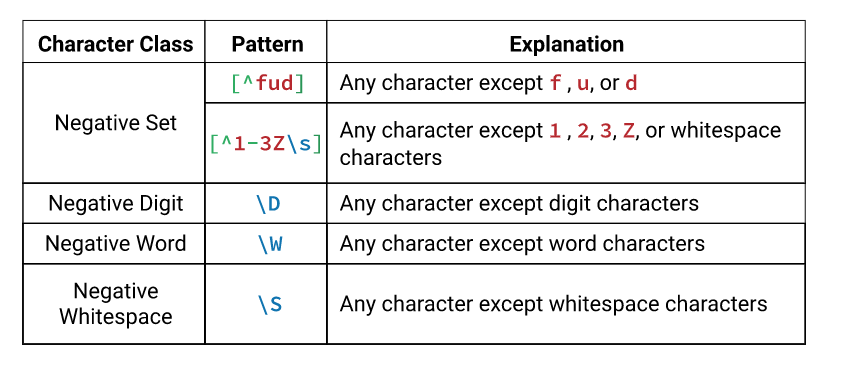

In [25]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

In [26]:
pattern = r'[Jj]ava[^Ss]'
first_10_matches(pattern)

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and p...
2493    Ask HN: I've been a java dev for a couple of y...
2751                Eventsourcing for Java 0.4.0 released
2910                2016 JavaOne Intel Keynote  32mn Talk
3452    What are the Differences Between Java Platform...
Name: title, dtype: object

# word boundary anchor: matches the position btwn a word character and non-word character (or word character and the start/end of a string)

In [27]:
#use word boundary \b to match the word
pattern = r'\b[Jj]ava\b'
java_titles = titles[titles.str.contains(pattern)]

# beginning anchor and end anchor
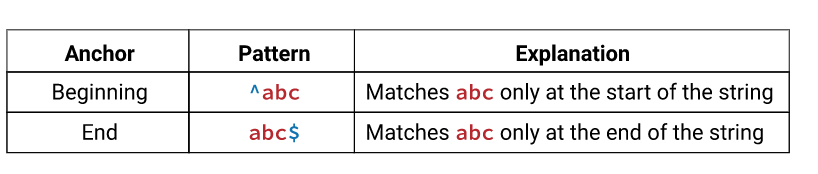

In [28]:
#looking for tags at beginning or ending of title
begin_pattern = r'^\[\w+\]'
beginning_count = titles.str.contains(begin_pattern).sum()
print(beginning_count) #tag occurs at beginning of title
end_pattern = r'\[\w+\]$'
ending_count = titles.str.contains(end_pattern).sum()
print(ending_count) #tag occurs at end of title

15
417


# ignore case with flag re.IGNORECASE (re.I)

In [29]:
email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])

In [30]:
#word anchor \b, character e, optional - or space [\-\s]?, characters mail, optional s, word anchor \b
email_pattern = r'\be[\-\s]?mails?\b'
email_bool = email_tests.str.contains(email_pattern, flags=re.I)
email_bool

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
dtype: bool

# Mission: Advanced Regex

In [31]:
pattern = r'sql'
sql_counts = titles.str.contains(pattern, flags=re.I).sum()

In [32]:
#only rows with some kind of sql mentioned
pattern = r"(\w+SQL)"
hn_sql = hn[hn['title'].str.contains(pattern, flags=re.I)].copy()

#get the extracted capture group
hn_sql['flavor'] = hn_sql['title'].str.extract(pattern, flags=re.I)
#make them all lower case
hn_sql['flavor'] = hn_sql['flavor'].str.lower()

#pivot table with mean num of comments per article mentioning sql flavor
flavors_freq = hn_sql['flavor'].value_counts()
sql_pivot = hn_sql.pivot_table(index='flavor',values='num_comments')

In [33]:
pattern = r'[Pp]ython ([\.\d]+)'
mybool = titles.str.contains(pattern)
py_titles = titles[mybool]
py_versions = py_titles.str.extract(pattern)
py_versions_freq = dict(py_versions[0].value_counts())
py_versions_freq

{'3': 10,
 '2': 3,
 '3.5': 3,
 '3.6': 2,
 '8': 1,
 '2.7': 1,
 '4': 1,
 '3.5.0': 1,
 '1.5': 1}

# finding matches for C language

In [34]:
#trying to find titles that reference the C language
pattern = r"\b[Cc]\b"
c_matches = first_10_matches(pattern)
c_matches

13                 Custom Deleters for C++ Smart Pointers
220                        Lisp, C++: Sadness in my heart
221                  MemSQL (YC W11) Raises $36M Series C
353     VW C.E.O. Personally Apologized to President O...
365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
508     BDE 3.0 (Bloomberg's core C++ library): Open S...
521          Fuchsia: Micro kernel written in C by Google
549     How to Become a C.E.O.? The Quickest Path Is a...
1282    A lightweight C++ signals and slots implementa...
Name: title, dtype: object

In [35]:
#need to use negative set to exclude . and + at end
pattern = r"\b[Cc]\b[^.+]"
c_matches = first_10_matches(pattern)
c_matches

365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
Name: title, dtype: object

# lookarounds

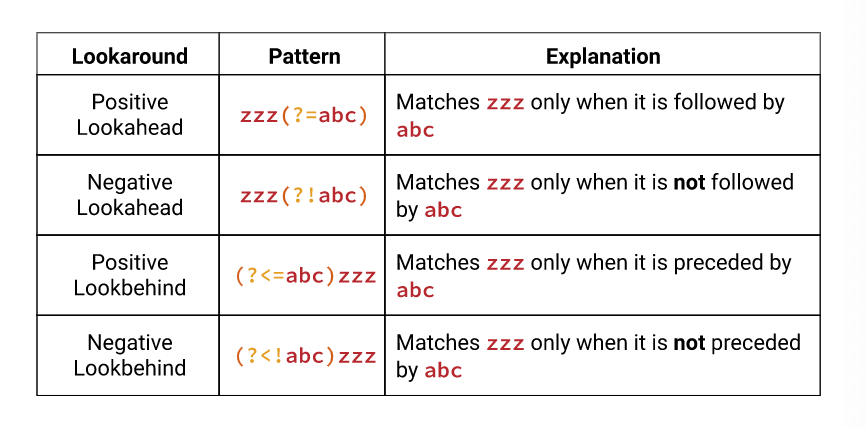

In [36]:
test_cases = ['Red_Green_Blue',
              'Yellow_Green_Red',
              'Red_Green_Red',
              'Yellow_Green_Blue',
              'Green']

In [37]:
def run_test_cases(pattern):
    for tc in test_cases:
        result = re.search(pattern, tc)
        print(result or "NO MATCH")

In [38]:
#_Blue must be after Green
run_test_cases(r"Green(?=_Blue)")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH
<re.Match object; span=(7, 12), match='Green'>
NO MATCH


In [39]:
#_Red must not be after Green
run_test_cases(r"Green(?!_Red)")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH
<re.Match object; span=(7, 12), match='Green'>
<re.Match object; span=(0, 5), match='Green'>


In [40]:
#Red_ must be before Green
run_test_cases(r"(?<=Red_)Green")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH


In [41]:
#Yellow_ must not be before Green
run_test_cases(r"(?<!Yellow_)Green")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
<re.Match object; span=(4, 9), match='Green'>
NO MATCH
<re.Match object; span=(0, 5), match='Green'>


In [42]:
#Green must be followed by exactly 5 characters
run_test_cases(r"Green(?=.{5})")

<re.Match object; span=(4, 9), match='Green'>
NO MATCH
NO MATCH
<re.Match object; span=(7, 12), match='Green'>
NO MATCH


# Sometimes programming languages won't implement support for all lookarounds (notably, lookbehinds are not in the official JavaScript specification). As an example, to get full support in the RegExr tool, you'll need to set it to use the PCRE regex engine.

In [45]:
#need to match when C is at the end of the string
#Series (with space) cannot be before C, + or . cannot be after C
pattern = r"(?<!Series )\b[Cc]\b(?![\+\.])"

In [48]:
c_mentions = titles.str.contains(pattern).sum()
c_mentions

102

# backreferences

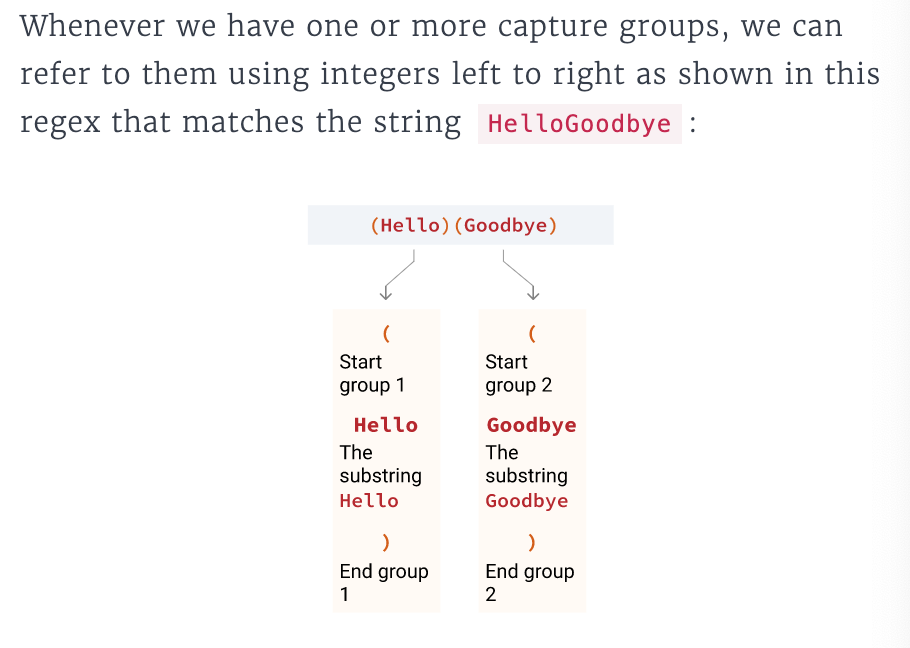

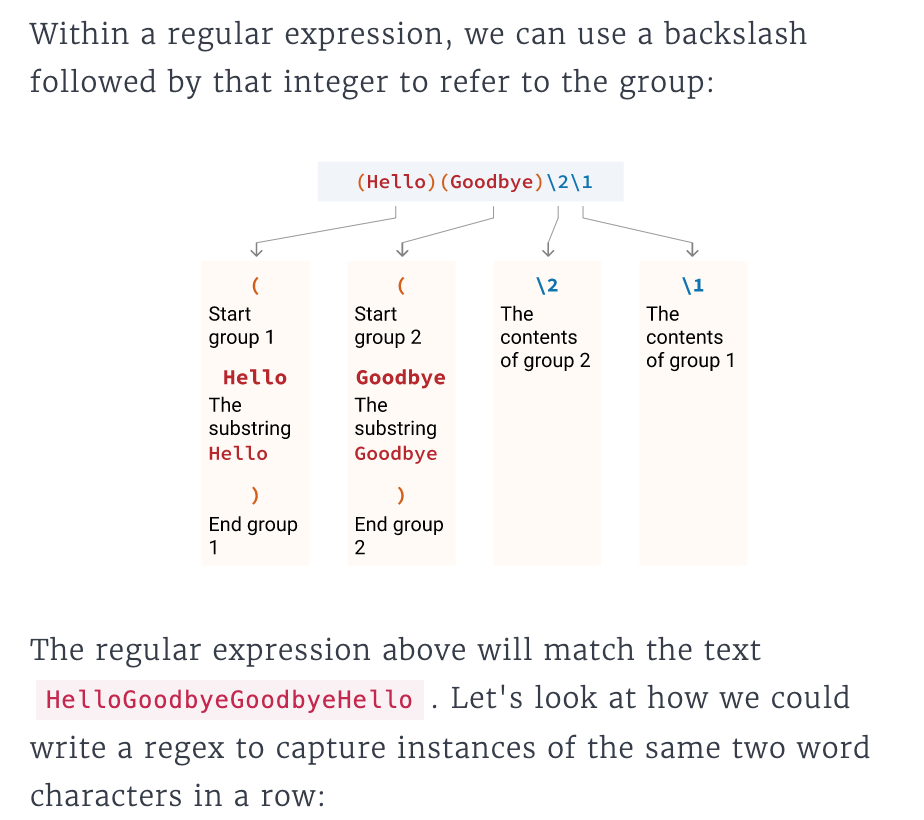

In [50]:
#find double-letter matches
#note, this doesn't match Aaron because A and a are different
test_cases = [
              "I'm going to read a book.",
              "Green is my favorite color.",
              "My name is Aaron.",
              "No doubles here.",
              "I have a pet eel."
             ]

for tc in test_cases:
    print(re.search(r"(\w)\1", tc))

<re.Match object; span=(21, 23), match='oo'>
<re.Match object; span=(2, 4), match='ee'>
None
None
<re.Match object; span=(13, 15), match='ee'>


In [51]:
#using pandas
test_cases = pd.Series(test_cases)
print(test_cases.str.contains(r"(\w)\1"))

0     True
1     True
2    False
3    False
4     True
dtype: bool


In [52]:
#boundary anchors before and after a word, space, same word
double_word_pattern = r"\b(\w+)\s\1\b"

In [54]:
repeated_words = titles[titles.str.contains(double_word_pattern)]
repeated_words

3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15839          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object

# use re.sub() to make variations uniform

In [55]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])

In [60]:
email_pattern = 'e-?\s?mail'
email_bool = email_variations.str.contains(email_pattern, flags = re.I)
email_count = email_bool.sum()
email_bool

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
dtype: bool

In [61]:
email_uniform = email_variations.str.replace(email_pattern, 'email', flags=re.I)
email_uniform

0    email
1    email
2    email
3    email
4    email
5    email
6    email
7    email
8    email
dtype: object

In [63]:
titles_clean = titles.str.replace(email_pattern, 'email', flags=re.I)
titles_clean

0                                Interactive Dynamic Video
1        Florida DJs May Face Felony for April Fools' W...
2             Technology ventures: From Idea to Enterprise
3        Note by Note: The Making of Steinway L1037 (2007)
4        Title II kills investment? Comcast and other I...
                               ...                        
20094    How Purism Avoids Intels Active Management Tec...
20095            YC Application Translated and Broken Down
20096    Microkernels are slow and Elvis didn't do no d...
20097                        How Product Hunt really works
20098    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20099, dtype: object

# get just the domain names of all urls

In [65]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])

In [66]:
#domain is inside the capture group. It contains any number of word, -, and . characters 
domain_pattern = r"https?://([\w\-\.]+)"

In [68]:
url_bool = test_urls.str.contains(pattern, flags = re.I)
url_bool

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
dtype: bool

In [70]:
domains = hn['url'].str.extract(pattern, flags=re.I)
domains

,0
0,www.interactivedynamicvideo.com
1,www.thewire.com
2,www.amazon.com
3,www.nytimes.com
4,arstechnica.com
...,...
20094,puri.sm
20095,medium.com
20096,blog.darknedgy.net
20097,medium.com


In [74]:
top_domains = domains[0].value_counts().head(5)
top_domains

github.com             1008
medium.com              825
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
Name: 0, dtype: int64

# extract the url components into three capture groups

In [75]:
#protocol, domain, page path: .* means 0 or more characters
pattern = r"(https?)://([\w\.\-]+)/?(.*)"

test_url_parts = test_urls.str.extract(pattern, flags=re.I)
url_parts = hn['url'].str.extract(pattern, flags=re.I)

In [76]:
url_parts

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


# named capture groups

In [77]:
pattern = r"(?P<protocol>https?)://(?P<domain>[\w\.\-]+)/?(?P<path>.*)"
url_parts = hn['url'].str.extract(pattern, flags=re.I)
url_parts

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...
